# Exercicio 1

In [62]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, accuracy_score, f1_score
import tensorflow as tf
from keras import layers, models, Input
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data = load_wine()
X, y = data.data, data.target

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_on = np.eye(len(np.unique(y)))[y]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_on, test_size=0.2, random_state=42)

In [49]:
model = models.Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4112 - loss: 1.0975 - val_accuracy: 0.6207 - val_loss: 0.9397
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6935 - loss: 0.9144 - val_accuracy: 0.9655 - val_loss: 0.8062
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8336 - loss: 0.8006 - val_accuracy: 0.9655 - val_loss: 0.6932
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9156 - loss: 0.7186 - val_accuracy: 0.9655 - val_loss: 0.5968
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9401 - loss: 0.6234 - val_accuracy: 0.9655 - val_loss: 0.5190
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9174 - loss: 0.5591 - val_accuracy: 1.0000 - val_loss: 0.4496
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9370 - loss: 0.4970 - val_accuracy: 1.0000 - val_loss: 0.3929
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9211 - loss: 0.4463 - val_accuracy: 1.0000 - val_loss: 0.3405


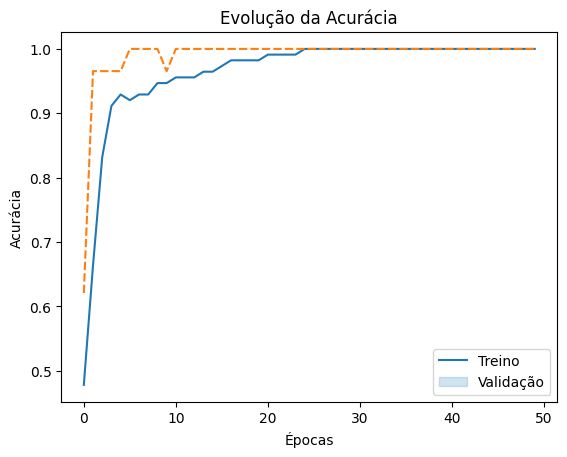

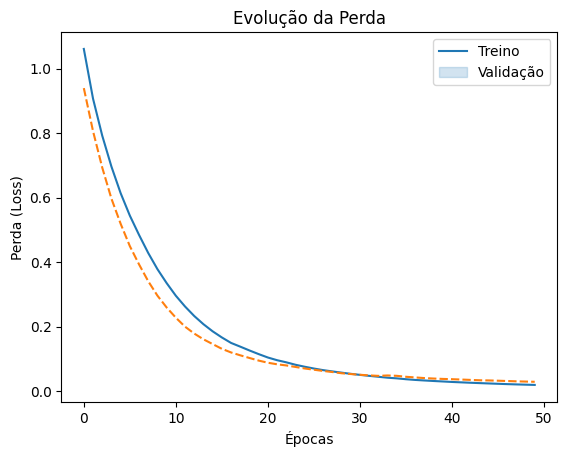

In [50]:
history_df = pd.DataFrame(history.history)

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.title("Evolução da Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend(['Treino', 'Validação'])
plt.show()

sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title("Evolução da Perda")
plt.xlabel("Épocas")
plt.ylabel("Perda (Loss)")
plt.legend(['Treino', 'Validação'])
plt.show()

In [51]:
y_pred = model.predict(X_test, verbose=0)
print("Primeira previsão:", y_pred[0])
print("Classe prevista:", np.argmax(y_pred[0]))
print("Classe real:", np.argmax(y_test[0]))

Primeira previsão: [0.9960475  0.00283681 0.00111568]
Classe prevista: 0
Classe real: 0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
               Accuracy  F1-Score
Random Forest       1.0       1.0
Neural Net          1.0       1.0


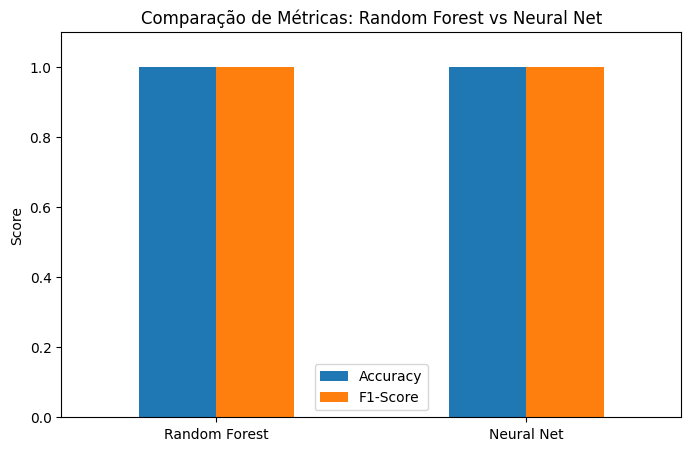

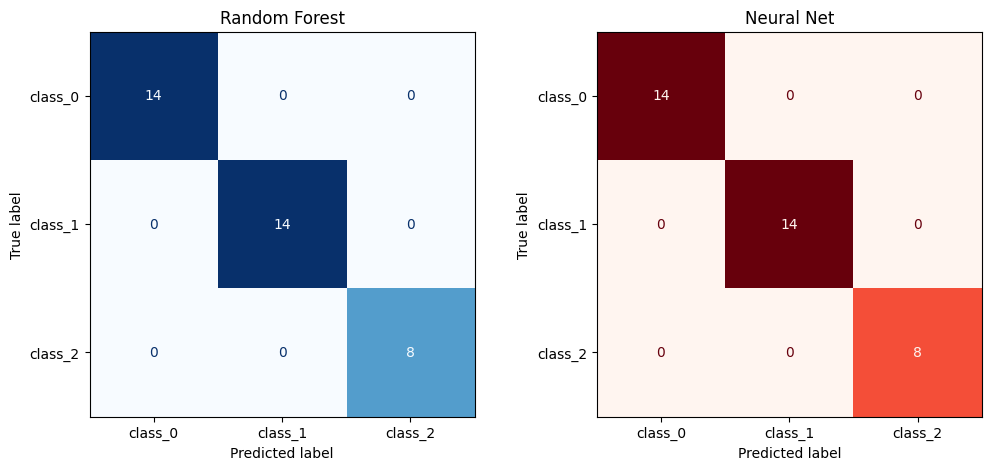

In [52]:
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_classes)
y_pred_rf = rf.predict(X_test)

y_pred_nn = model.predict(X_test)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

metrics = {
    "Accuracy": [accuracy_score(y_test_classes, y_pred_rf), accuracy_score(y_test_classes, y_pred_nn_classes)],
    "F1-Score": [f1_score(y_test_classes, y_pred_rf, average='weighted'), f1_score(y_test_classes, y_pred_nn_classes, average='weighted')]
}

comparison_df = pd.DataFrame(metrics, index=['Random Forest', 'Neural Net'])
print(comparison_df)

comparison_df.plot(kind='bar', figsize=(8,5))
plt.title("Comparação de Métricas: Random Forest vs Neural Net")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_rf = confusion_matrix(y_test_classes, y_pred_rf)
cm_nn = confusion_matrix(y_test_classes, y_pred_nn_classes)

ConfusionMatrixDisplay(cm_rf, display_labels=data.target_names).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Random Forest")

ConfusionMatrixDisplay(cm_nn, display_labels=data.target_names).plot(ax=axes[1], cmap='Reds', colorbar=False)
axes[1].set_title("Neural Net")

plt.show()

# Exercicio 2

In [30]:
from sklearn.datasets import fetch_california_housing

In [53]:
data = fetch_california_housing()

X, y = data.data, data.target

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = models.Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2503 - mae: 0.7649 - val_loss: 0.4085 - val_mae: 0.4586
Epoch 2/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3787 - mae: 0.4391 - val_loss: 0.3747 - val_mae: 0.4308
Epoch 3/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3553 - mae: 0.4192 - val_loss: 0.3499 - val_mae: 0.4151
Epoch 4/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3376 - mae: 0.4047 - val_loss: 0.3321 - val_mae: 0.3983
Epoch 5/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3096 - mae: 0.3899 - val_loss: 0.3419 - val_mae: 0.4168
Epoch 6/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3128 - mae: 0.3902 - val_loss: 0.3200 - val_mae: 0.3922
Epoch 7/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3104 - mae: 0.3860 - val_loss: 0.3192 - val_mae: 0.3833
Epoch 8/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2893 - mae: 0.3725 - val_loss: 0.3194 - val_mae: 0.3942
Epoch 9/50
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lo

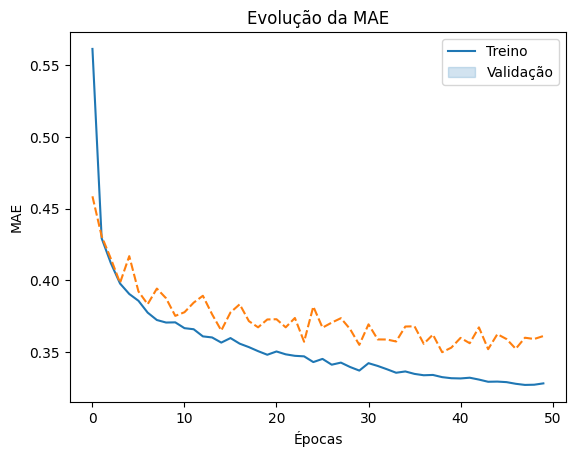

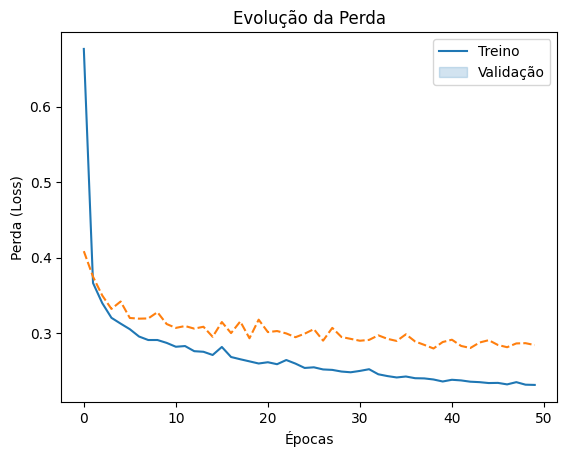

In [56]:
history_df = pd.DataFrame(history.history)

sns.lineplot(data=history_df[['mae', 'val_mae']])
plt.title("Evolução da MAE")
plt.xlabel("Épocas")
plt.ylabel("MAE")
plt.legend(['Treino', 'Validação'])
plt.show()

sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title("Evolução da Perda")
plt.xlabel("Épocas")
plt.ylabel("Perda (Loss)")
plt.legend(['Treino', 'Validação'])
plt.show()

In [60]:
y_pred_nn = model.predict(X_test).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print("Primeira previsão:", y_pred_nn[0])
print("Previsto:", y_pred_nn[0])
print("Real:", y_test[0])

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Primeira previsão: 0.4952037
Previsto: 0.4952037
Real: 0.477


In [64]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

/tmp/ipython-input-3449101861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="RMSE", data=results, palette="viridis")


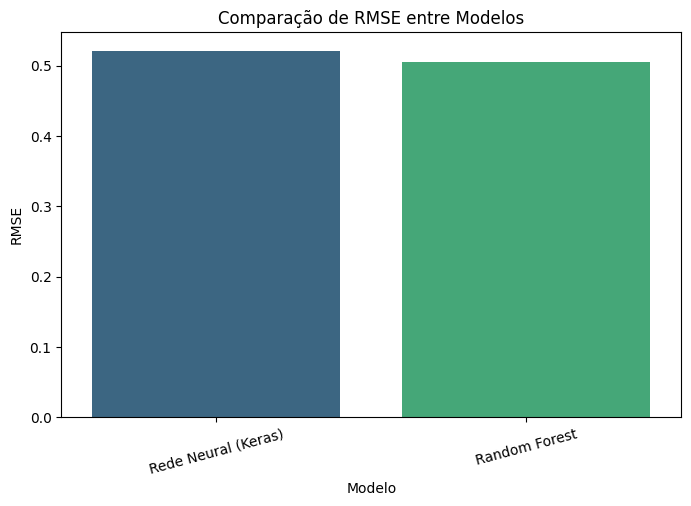

/tmp/ipython-input-3449101861.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="MAE", data=results, palette="magma")


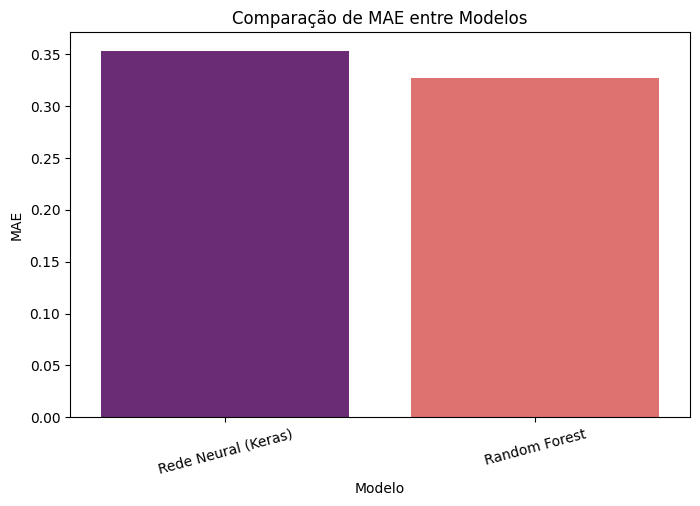

In [65]:
results = pd.DataFrame({
     "Modelo": ["Rede Neural (Keras)", "Random Forest"],
     "RMSE": [rmse_nn, rmse_rf],
     "MAE": [mae_nn, mae_rf]
})
plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="RMSE", data=results, palette="viridis")
plt.title("Comparação de RMSE entre Modelos")
plt.ylabel("RMSE")
plt.xlabel("Modelo")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="MAE", data=results, palette="magma")
plt.title("Comparação de MAE entre Modelos")
plt.ylabel("MAE")
plt.xlabel("Modelo")
plt.xticks(rotation=15)

plt.show()